In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyvi import ViTokenizer

In [3]:
ALL_DATASET = '/home/ductri/code/all_dataset/'
ENTROPY_DATASET = ALL_DATASET + 'entropy_2018/'
df = pd.read_csv(ENTROPY_DATASET + 'all_data.csv')

In [ ]:
df['sentence_length'] = df['sentence'].map(len)

print('Total training data: {}'.format(df.shape[0]))
df.hist('sentence_length', bins=500, range=(0, 1000))
plt.show()

In [ ]:
df.groupby('sentiment').describe()

In [ ]:
shuffled_index = list(range(df.shape[0]))
np.random.shuffle(shuffled_index)

In [ ]:
df_shuffled = df.iloc[shuffled_index, :]

In [ ]:
df.head()

In [ ]:
df_shuffled.head()

In [ ]:
del df_shuffled['sentence_length']

In [ ]:
train_ratio = 0.7
split_index = int(train_ratio*df_shuffled.shape[0])
# df_shuffled.iloc[:split_index, :].to_csv(ENTROPY_DATASET + 'training_set.csv', index=False)
# df_shuffled.iloc[split_index:, :].to_csv(ENTROPY_DATASET + 'test_set.csv', index=False)

In [5]:
df_train = pd.read_csv(ENTROPY_DATASET + 'training_set.csv')
df_test = pd.read_csv(ENTROPY_DATASET + 'test_set.csv')

In [6]:
df_train['length'] = df_train['sentence'].map(len)
df_test['length'] = df_test['sentence'].map(len)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f330df6b828>]],
      dtype=object)

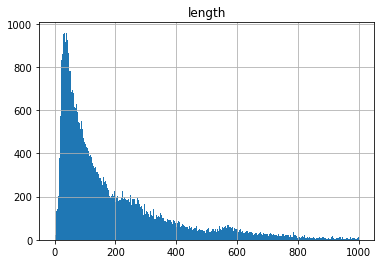

In [7]:
df_train.hist('length', bins=500, range=(0, 1000))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33109b4b00>]],
      dtype=object)

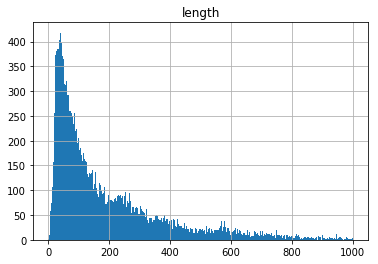

In [8]:
df_test.hist('length', bins=500, range=(0, 1000))

In [46]:
text=df_test.iloc[14638]['sentence']

In [48]:
text="""******************************************************************** vinaphone plus - chương trình ưu đãi đích thực ******************************************************************** áp đụng cho tất cả các thuê bao di động vinaphone trả trước/trả sau đang hoạt động. khi là hội viên, quý khách hàng được hưởng các chương trình miễn phí/giảm giá từ vinaphone và các đối tác liên kết dựa theo mức điểm tích lũy của từng hội viên.  > quý khách có thể đăng ký qua  hình thức như sau: , soạn tin dk gửi  và làm theo hướng dẫn; , truy cập  urlpatt  , tải ứng dụng vinaphone plus về máy di động và đăng ký; , đăng ký trực tiếp tại các điểm giao dịch của vinaphone. >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> ứng dụng trao tay - nhận ngay ưu đãi ----------------------------------------------------------------------------------------- hãy đăng ký thành viên vinaphone plus ngay hôm nay vnpt - vinaphone điện biên added  new photos — feeling excited. photos from vnpt - vinaphone điện biên's post"""

In [ ]:

ViTokenizer.tokenize(text).split(' ')

In [ ]:
texts.iloc[-5]

In [28]:
len(text)

3974